In [1]:
import urllib.request
# データのダウンロード
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", "allice.txt")

('allice.txt', <http.client.HTTPMessage at 0x10fee6518>)

In [2]:
with open('allice.txt', 'r') as f:
    print(f.read()[:14])

﻿Project Guten


In [3]:
with open('allice.txt', 'r', encoding='UTF-8') as f:
    print(f.read()[710:1400])  # 710~1400文字目まで取り出す。



CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ thought Alice ‘without pictures or
conversations?’

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice 


In [4]:
from sklearn.feature_extraction.text import CountVectorizer  # BoWをしてくれるクラス。

In [5]:
txt_vec = CountVectorizer(input='filename')

In [6]:
txt_vec.fit(['allice.txt'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='filename',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
txt_vec.get_feature_names()[100:120]

['along',
 'aloud',
 'already',
 'also',
 'alteration',
 'altered',
 'alternate',
 'alternately',
 'altogether',
 'always',
 'am',
 'ambition',
 'among',
 'an',
 'ancient',
 'and',
 'anger',
 'angrily',
 'angry',
 'animal']

In [8]:
txt_vec.vocabulary_

{'crocodile': 571,
 'ours': 1824,
 'detach': 667,
 'pretty': 2000,
 'result': 2180,
 'govern': 1124,
 'animals': 120,
 'grunted': 1158,
 'bright': 314,
 'became': 230,
 'lieu': 1501,
 'supple': 2563,
 'about': 26,
 'clinging': 454,
 'accept': 30,
 'others': 1819,
 'corners': 536,
 'rattling': 2099,
 'patiently': 1876,
 'visit': 2854,
 'downward': 747,
 'trying': 2742,
 'miss': 1648,
 'finished': 983,
 'shingle': 2334,
 'accounts': 42,
 'pair': 1845,
 'complying': 487,
 'head': 1203,
 'disclaimer': 695,
 'hundred': 1275,
 'modification': 1657,
 '1500': 2,
 'pack': 1839,
 'whatsoever': 2914,
 'idiotic': 1291,
 'wise': 2954,
 'pictured': 1921,
 'care': 364,
 'court': 550,
 'desperately': 664,
 'accessed': 35,
 'muttering': 1691,
 'muttered': 1690,
 'heap': 1205,
 'games': 1086,
 'skirt': 2397,
 'set': 2301,
 'executes': 874,
 'pocket': 1958,
 'tremulous': 2725,
 'respectful': 2176,
 'tight': 2671,
 'sorry': 2458,
 'scroll': 2267,
 'representations': 2167,
 'bit': 270,
 'writing': 2990,
 '

In [9]:
sorted(txt_vec.vocabulary_.items(), key=lambda x: x[0])

[('000', 0),
 ('11', 1),
 ('1500', 2),
 ('1887', 3),
 ('1994', 4),
 ('20', 5),
 ('2001', 6),
 ('2008', 7),
 ('2016', 8),
 ('25', 9),
 ('30', 10),
 ('4557', 11),
 ('50', 12),
 ('501', 13),
 ('596', 14),
 ('60', 15),
 ('6221541', 16),
 ('64', 17),
 ('801', 18),
 ('809', 19),
 ('84116', 20),
 ('90', 21),
 ('99712', 22),
 ('_i_', 23),
 ('abide', 24),
 ('able', 25),
 ('about', 26),
 ('above', 27),
 ('absence', 28),
 ('absurd', 29),
 ('accept', 30),
 ('acceptance', 31),
 ('accepted', 32),
 ('accepting', 33),
 ('access', 34),
 ('accessed', 35),
 ('accessible', 36),
 ('accident', 37),
 ('accidentally', 38),
 ('accordance', 39),
 ('account', 40),
 ('accounting', 41),
 ('accounts', 42),
 ('accusation', 43),
 ('accustomed', 44),
 ('ache', 45),
 ('across', 46),
 ('act', 47),
 ('active', 48),
 ('actual', 49),
 ('actually', 50),
 ('ada', 51),
 ('added', 52),
 ('adding', 53),
 ('addition', 54),
 ('additional', 55),
 ('additions', 56),
 ('address', 57),
 ('addressed', 58),
 ('addresses', 59),
 ('addre

In [10]:
len(txt_vec.get_feature_names())

3019

In [18]:
allice_vec = txt_vec.transform(['allice.txt'])

In [19]:
allice_vec # 疎行列になっている。

<1x3019 sparse matrix of type '<class 'numpy.int64'>'
	with 3019 stored elements in Compressed Sparse Row format>

In [20]:
allice_vec.shape

(1, 3019)

In [21]:
allice_vec = allice_vec.toarray()
allice_vec

array([[1, 4, 1, ..., 1, 1, 1]])

In [22]:
allice_vec[0, 100:120]

array([  6,   5,   3,   4,   1,   1,   1,   1,   5,  13,  16,   1,  12,
        61,   1, 940,   2,   9,   5,   2])

In [23]:
for word,count in zip(txt_vec.get_feature_names()[100:120], allice_vec[0, 100:120]):
    print(word, count)

along 6
aloud 5
already 3
also 4
alteration 1
altered 1
alternate 1
alternately 1
altogether 5
always 13
am 16
ambition 1
among 12
an 61
ancient 1
and 940
anger 2
angrily 9
angry 5
animal 2


In [1]:
from sklearn.datasets import load_sample_image

In [2]:
flower = load_sample_image('flower.jpg')
flower.shape

(427, 640, 3)

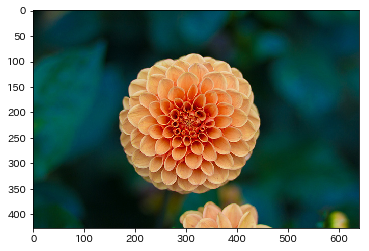

In [7]:
plt.imshow(flower)

In [5]:
china = load_sample_image('china.jpg')
china.shape

(427, 640, 3)

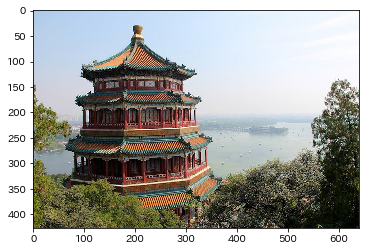

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.imshow(china);

In [81]:
china.shape

(427, 640, 3)

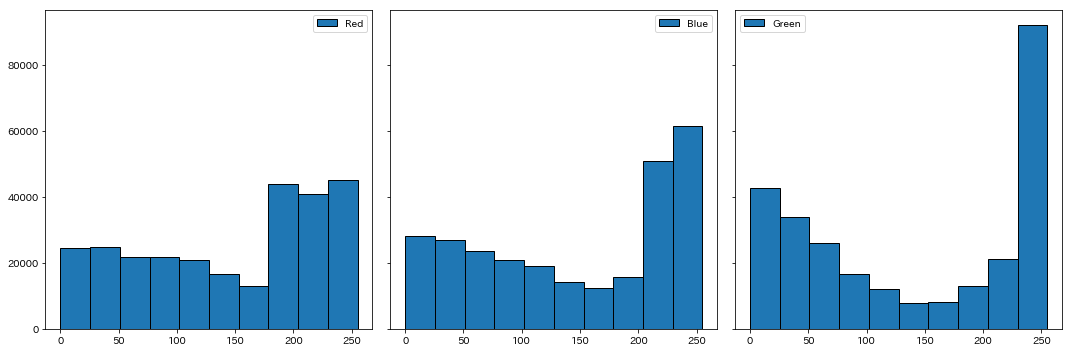

In [10]:
labels=['Red', 'Blue', 'Green']
fig, ax= plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, label in enumerate(labels):
    ax[i].hist(china[:,:,i].ravel(), bins=10, label=label) # bins=10 棒グラフ10本で表せということ。
    ax[i].legend()
plt.tight_layout()

In [83]:
china[:,:,0].shape

(427, 640)

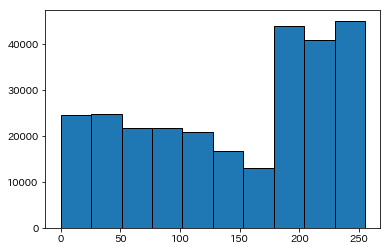

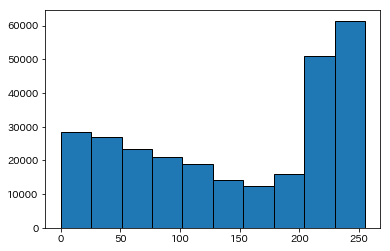

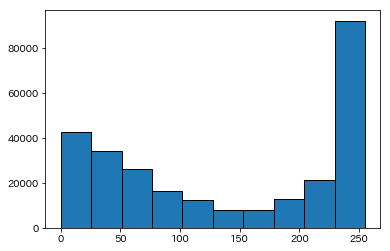

In [12]:
histR = plt.hist(china[:,:,0].ravel(), bins=10)
plt.show()
histG = plt.hist(china[:,:,1].ravel(), bins=10)
plt.show()
histB = plt.hist(china[:,:,2].ravel(), bins=10)
plt.show()

In [13]:
"""
n : 縦軸の値の数列
bins : 横軸の区切りとなる座標（各ビンの始点）
"""
histR # 返り値は(n, bins, patches) のタプル

(array([ 24625.,  24711.,  21764.,  21691.,  20822.,  16751.,  13087.,
         43875.,  40853.,  45101.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

In [14]:
import numpy as np

histRGBcat = np.hstack((histR[0], histG[0], histB[0])) # hstack 横方向に連結 vstack は縦方向
histRGBcat

array([ 24625.,  24711.,  21764.,  21691.,  20822.,  16751.,  13087.,
        43875.,  40853.,  45101.,  28271.,  26888.,  23467.,  20986.,
        18978.,  14141.,  12460.,  15812.,  50845.,  61432.,  42566.,
        33965.,  26037.,  16535.,  12166.,   7713.,   8038.,  12974.,
        21175.,  92111.])

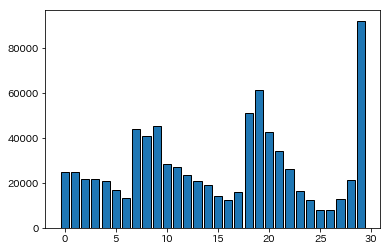

In [16]:
plt.bar(range(len(histRGBcat)), histRGBcat);

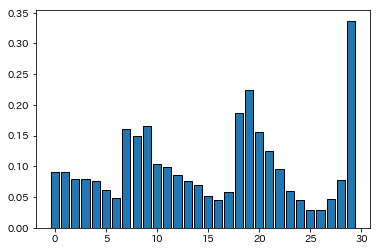

In [17]:
histRGBcat_l1 = histRGBcat / (china.shape[0]*china.shape[1])  # 正規化　
#　他の画像にも同様のことをするので、比較できるように正規化する。　つまり、画素数でわる。
plt.bar(range(len(histRGBcat_l1)), histRGBcat_l1);

In [18]:
histRGBcat_l1 # これが画像の特徴ベクトル。 30次元

array([ 0.09010905,  0.09042374,  0.07963993,  0.0793728 ,  0.07619292,
        0.06129611,  0.04788861,  0.16054962,  0.14949136,  0.16503586,
        0.10345067,  0.09838993,  0.08587163,  0.07679303,  0.06944526,
        0.05174546,  0.04559426,  0.05786007,  0.1860546 ,  0.22479508,
        0.15575966,  0.12428645,  0.09527591,  0.06050571,  0.04451844,
        0.0282238 ,  0.02941306,  0.04747512,  0.07748463,  0.33705723])

In [65]:
import numpy as np
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [66]:
a.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [67]:
b = np.arange(27).reshape(3, 3, 3)
b

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [68]:
b.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])